<a href="https://colab.research.google.com/github/antomys/ClusterizingData/blob/master/ClusterizingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import os
import shutil
from os import listdir
from os.path import isfile, join

# Preprocess. Getting needed data.

In [77]:
try:
    os.mkdir('./clusterization')
except Exception as e:
    print(e)

file_path = './clusterization/CC.csv'
shutil.copy2('../content/drive/MyDrive/clusterization/CC GENERAL.csv', file_path)

[Errno 17] File exists: './clusterization'


'./clusterization/CC.csv'

In [78]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA, FactorAnalysis
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings('ignore')

In [79]:
df = pd.read_csv(file_path)
data = df.copy()
data.columns = data.columns.str.lower()

In [80]:
data.head()

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [81]:
data.shape

(8950, 18)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   balance                           8950 non-null   float64
 2   balance_frequency                 8950 non-null   float64
 3   purchases                         8950 non-null   float64
 4   oneoff_purchases                  8950 non-null   float64
 5   installments_purchases            8950 non-null   float64
 6   cash_advance                      8950 non-null   float64
 7   purchases_frequency               8950 non-null   float64
 8   oneoff_purchases_frequency        8950 non-null   float64
 9   purchases_installments_frequency  8950 non-null   float64
 10  cash_advance_frequency            8950 non-null   float64
 11  cash_advance_trx                  8950 non-null   int64  
 12  purcha

In [83]:
data.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [84]:
data.isnull().sum().sort_values(ascending=False)

minimum_payments                    313
credit_limit                          1
cust_id                               0
balance                               0
prc_full_payment                      0
payments                              0
purchases_trx                         0
cash_advance_trx                      0
cash_advance_frequency                0
purchases_installments_frequency      0
oneoff_purchases_frequency            0
purchases_frequency                   0
cash_advance                          0
installments_purchases                0
oneoff_purchases                      0
purchases                             0
balance_frequency                     0
tenure                                0
dtype: int64

# EDA

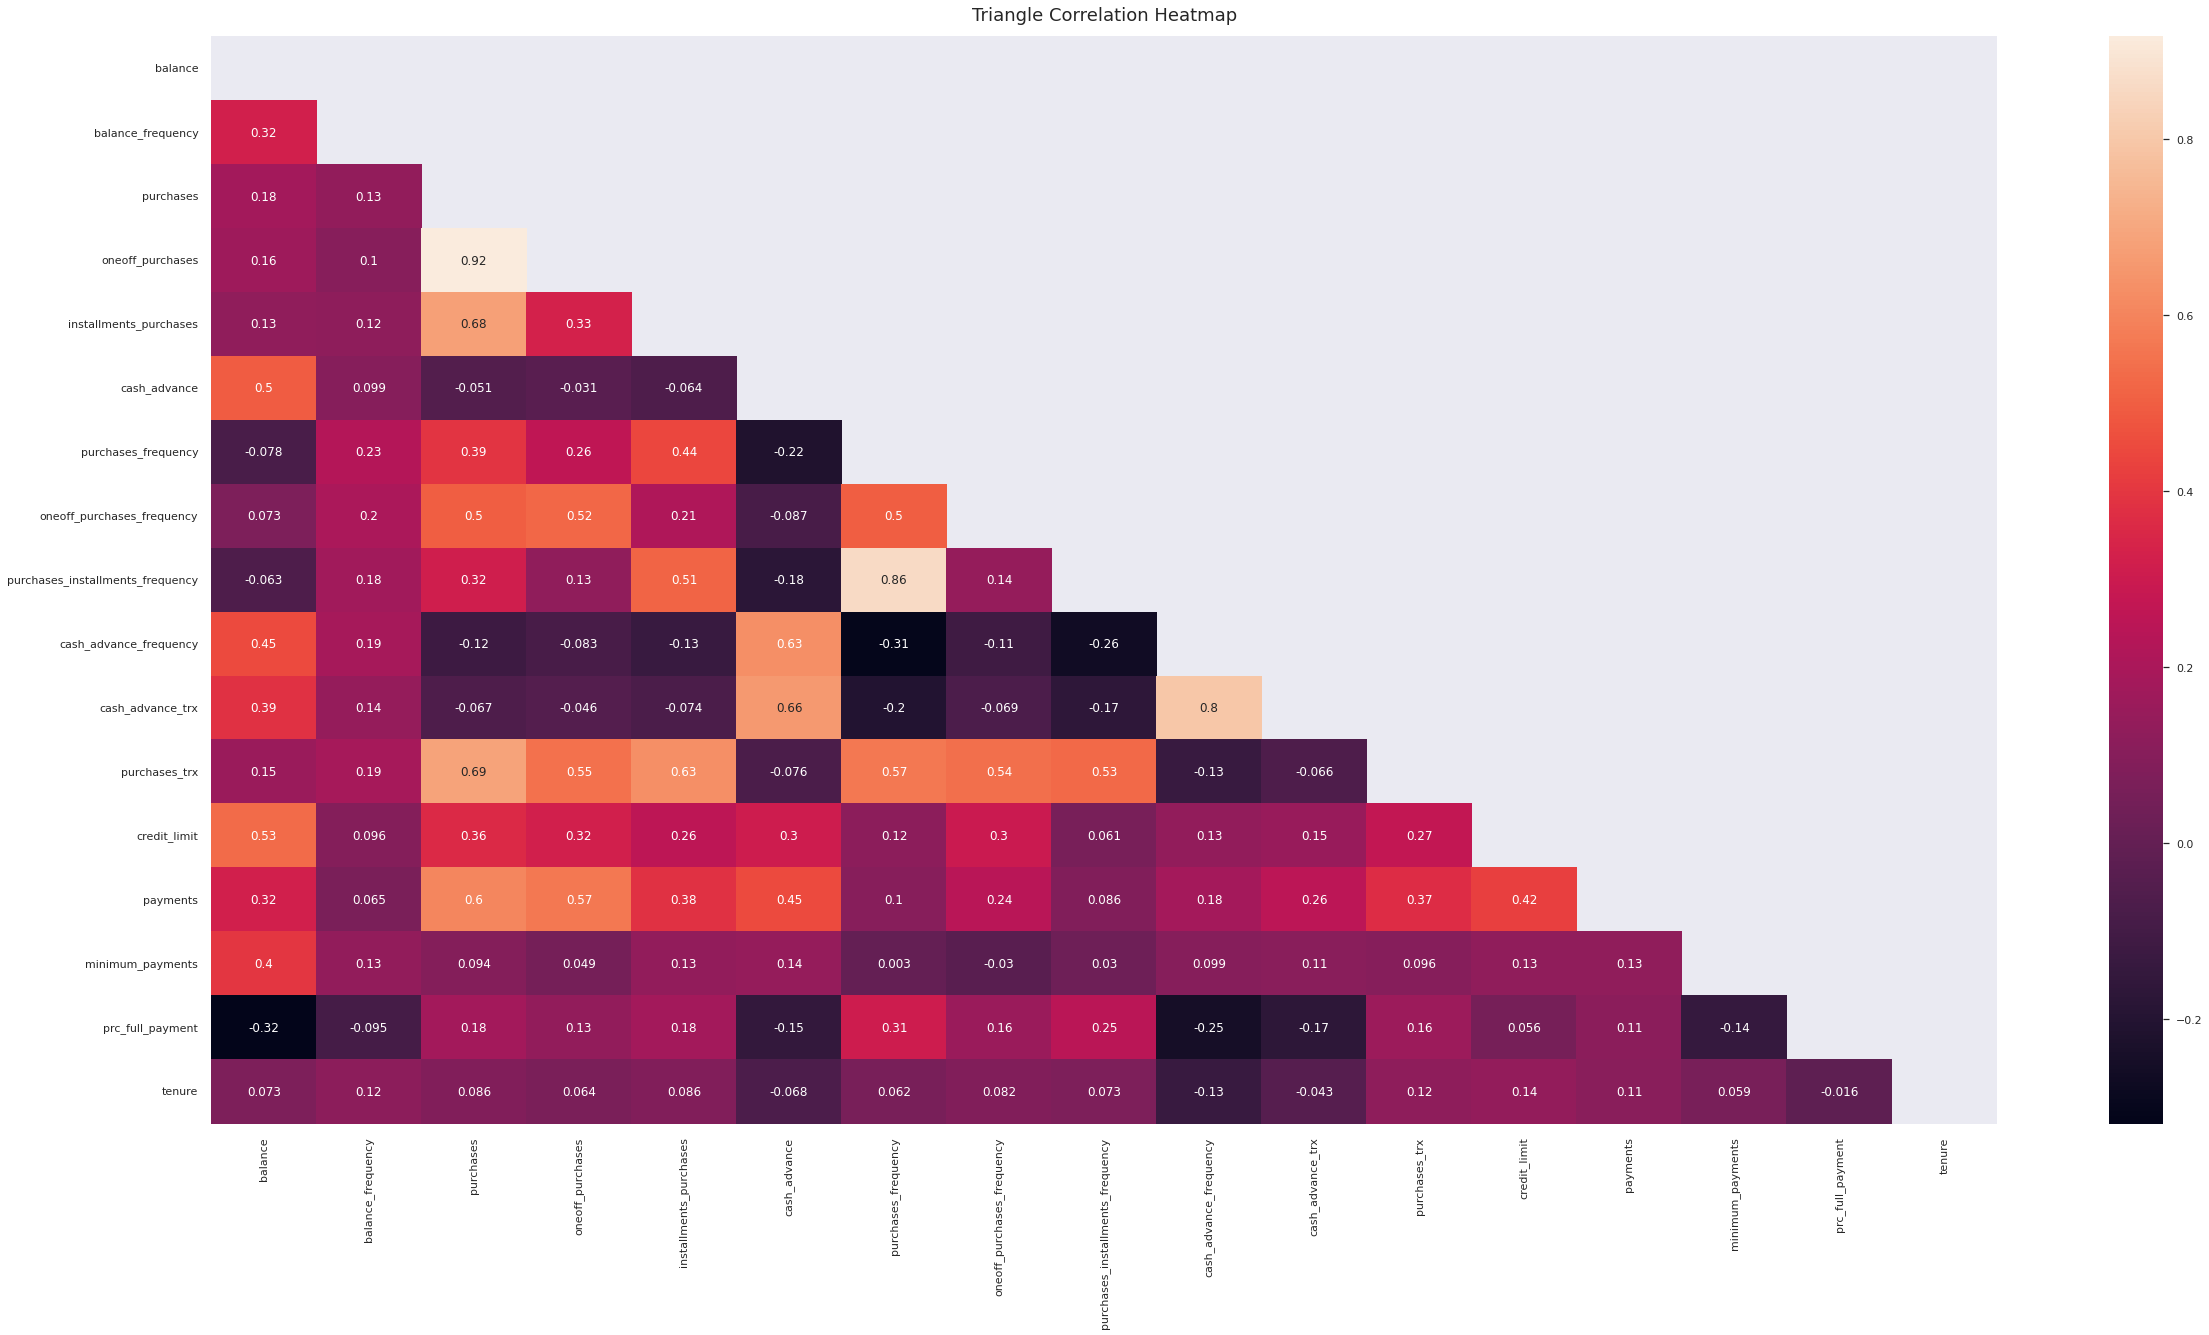

In [85]:
plt.figure(figsize=(40, 20))
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), annot=True, mask=mask)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

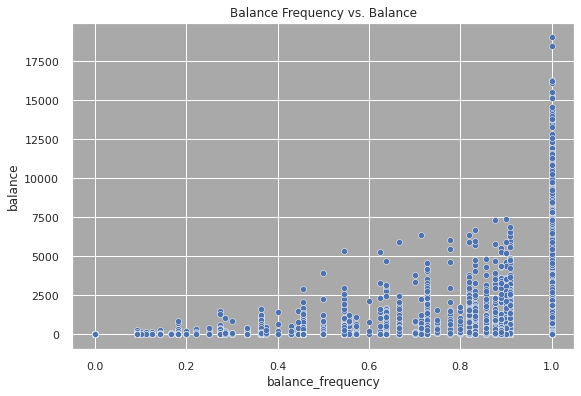

In [86]:
plt.figure(figsize=(9,6))
ax = plt.axes() 
ax.set_facecolor('darkgrey') 
g = sns.scatterplot(x='balance_frequency', y='balance', data=data)
g.set_title('Balance Frequency vs. Balance')
plt.show()

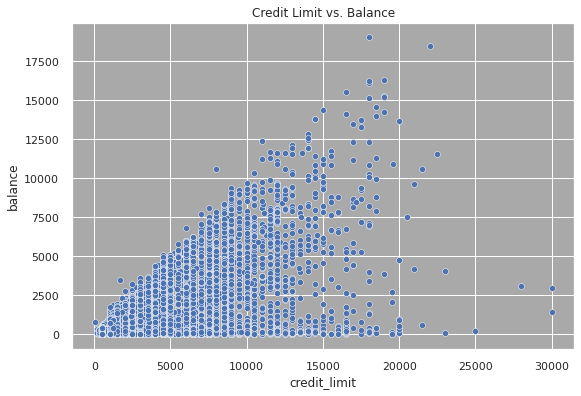

In [87]:
plt.figure(figsize=(9,6))
ax = plt.axes() 
ax.set_facecolor('darkgrey') 
g = sns.scatterplot(x='credit_limit', y='balance', data=data)
g.set_title('Credit Limit vs. Balance')
plt.show()

In [88]:
o_cols = data.select_dtypes(include=['object']).columns.tolist()
num_cols = data.select_dtypes(exclude=['object']).columns.tolist()

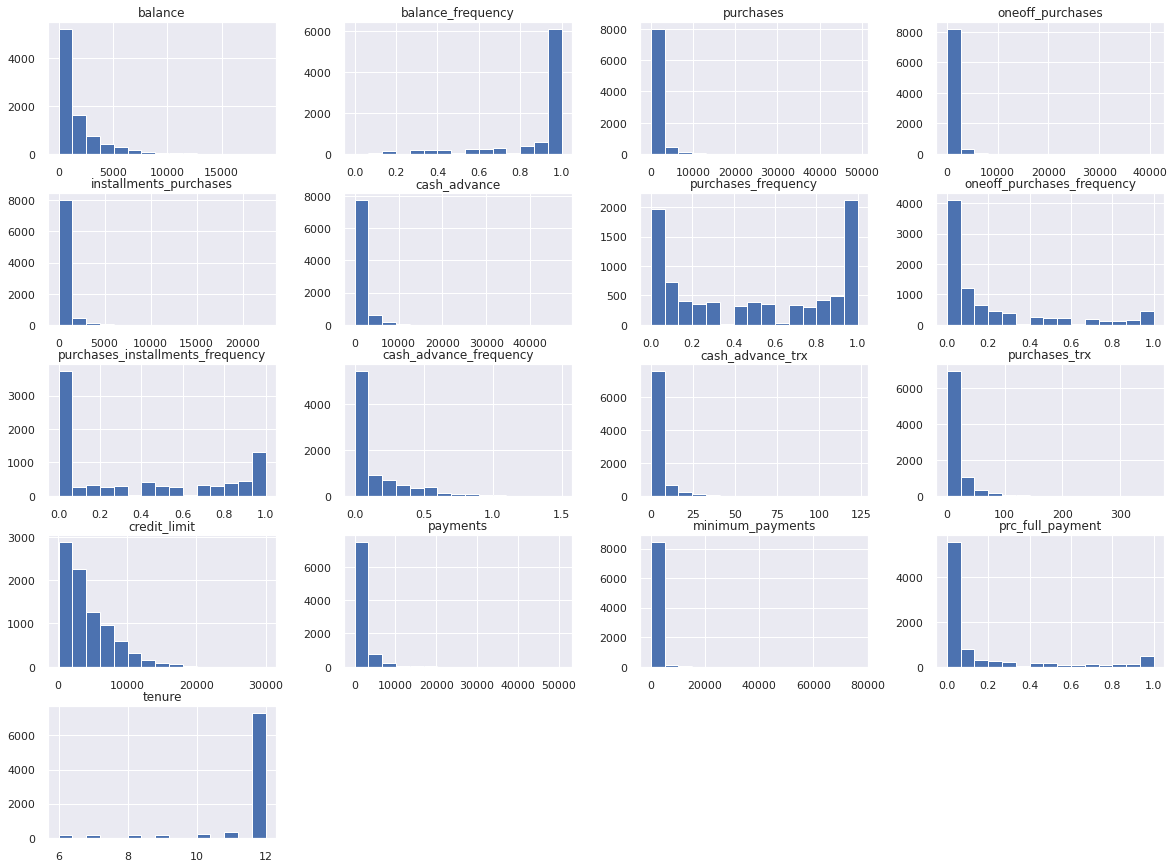

In [153]:
data[num_cols].hist(bins=15, figsize=(20, 15), layout=(5, 4));

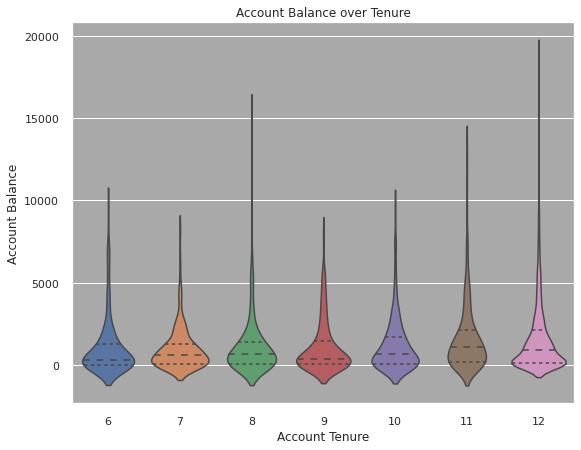

In [90]:
plt.figure(figsize=(9,7))
ax = plt.axes() 
ax.set_facecolor('darkgrey')
sns.violinplot(x='tenure', y='balance', data=data, inner='quartile')
plt.xlabel('Account Tenure')
plt.ylabel('Account Balance')
plt.title('Account Balance over Tenure')
plt.show()

In [91]:
#cust_id is not needed for this analysis, so we can drop it here
data.drop(columns='cust_id', inplace=True) #We know each record represents a card holder.

In [92]:
data.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [93]:
#dropping the na values to maintain genuine data records, and the proportion of missing values
#is so small in virtually one column.
data.dropna(axis='index', inplace=True)

In [94]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [95]:
hier_cluster = linkage(data_scaled, method='ward')

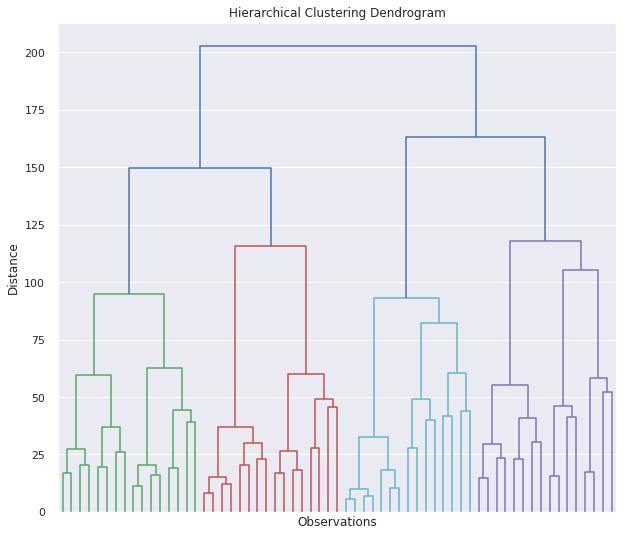

In [96]:
plt.figure(figsize=(10,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_cluster, truncate_mode='level', p = 5, show_leaf_counts=False, no_labels=True)
plt.show()

The easiest observation from our dendrogram is having around 4 clades. Above a height of 125, if draw a horizontal line, we have 4 general clusters over our data.

# K-Means Clustering + PCA

In [97]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=3)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

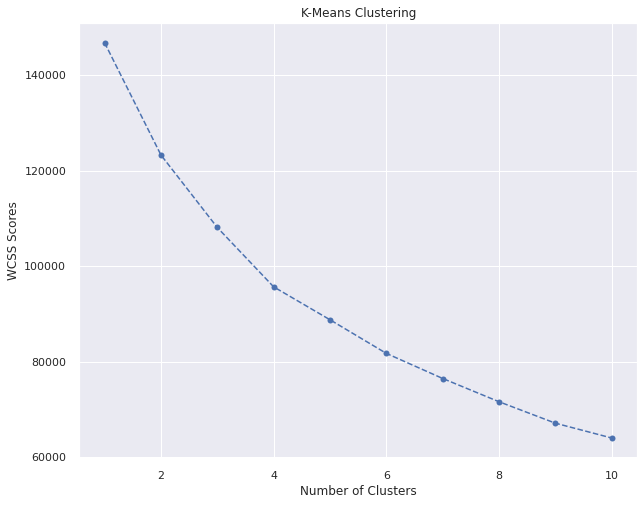

In [98]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Scores')
plt.title('K-Means Clustering')
plt.show()

To make a judegement based on the dendrogram and our within cluster sum of squares metric, we can run another kmeans with 4 clusters and plot our result. It's a little more difficult to judge since we don't have a definite 'elbow' here.



In [99]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=3)
kmeans.fit(data_scaled)

KMeans(n_clusters=4, random_state=3)

In [100]:
data_kmeans = data.copy()
data_kmeans['KMeans Segment'] = kmeans.labels_

In [101]:
data_transf_kmeans = data_kmeans.groupby('KMeans Segment').mean()
data_transf_kmeans

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
KMeans Segment,,,,,,,,,,,,,,,,,
0,1061.245064,0.818901,273.943703,210.942878,63.279848,606.661232,0.174488,0.087724,0.083122,0.119162,2.211038,2.997898,3259.159877,1013.575184,573.842255,0.084056,11.479106
1,913.099184,0.946169,1264.675431,611.072630,653.884203,218.409256,0.887404,0.302467,0.713691,0.043817,0.815910,22.511429,4254.075054,1373.189779,649.316887,0.274334,11.601036
2,3586.147809,0.986840,7816.070736,5194.559518,2623.034061,658.230083,0.944589,0.737344,0.786971,0.070831,2.098985,90.347716,9775.380711,7454.041676,2016.140976,0.291842,11.949239
3,4655.121148,0.969212,505.501029,319.814377,185.774602,4585.995163,0.290473,0.139730,0.187859,0.487255,14.448097,7.753460,7649.268638,3556.895507,2037.975309,0.035326,11.385813


Based on these different segments of groups, we can attempt to make inferences on the groups and assign names to them.



In [102]:
#Can contort names again if we dig out more granular details.
data_transf_kmeans.rename({0:'Infrequent Purchasers', 1:'Middle-Ground', 2:'High Volume Purchasers', 3:'In-Advance Frequent Payers'})

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
KMeans Segment,,,,,,,,,,,,,,,,,
Infrequent Purchasers,1061.245064,0.818901,273.943703,210.942878,63.279848,606.661232,0.174488,0.087724,0.083122,0.119162,2.211038,2.997898,3259.159877,1013.575184,573.842255,0.084056,11.479106
Middle-Ground,913.099184,0.946169,1264.675431,611.072630,653.884203,218.409256,0.887404,0.302467,0.713691,0.043817,0.815910,22.511429,4254.075054,1373.189779,649.316887,0.274334,11.601036
High Volume Purchasers,3586.147809,0.986840,7816.070736,5194.559518,2623.034061,658.230083,0.944589,0.737344,0.786971,0.070831,2.098985,90.347716,9775.380711,7454.041676,2016.140976,0.291842,11.949239
In-Advance Frequent Payers,4655.121148,0.969212,505.501029,319.814377,185.774602,4585.995163,0.290473,0.139730,0.187859,0.487255,14.448097,7.753460,7649.268638,3556.895507,2037.975309,0.035326,11.385813


In [103]:
data_kmeans['Labels'] = data_kmeans['KMeans Segment'].map({0:'Infrequent Purchasers', 1:'Middle-Ground', 
                                                           2:'High Volume Purchasers', 3:'In-Advance Frequent Payers'})

In [104]:
data_kmeans.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,KMeans Segment,Labels
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,0,Infrequent Purchasers
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3,In-Advance Frequent Payers
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,1,Middle-Ground
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,0,Infrequent Purchasers
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1,Middle-Ground


# KMeans Segment Analysis


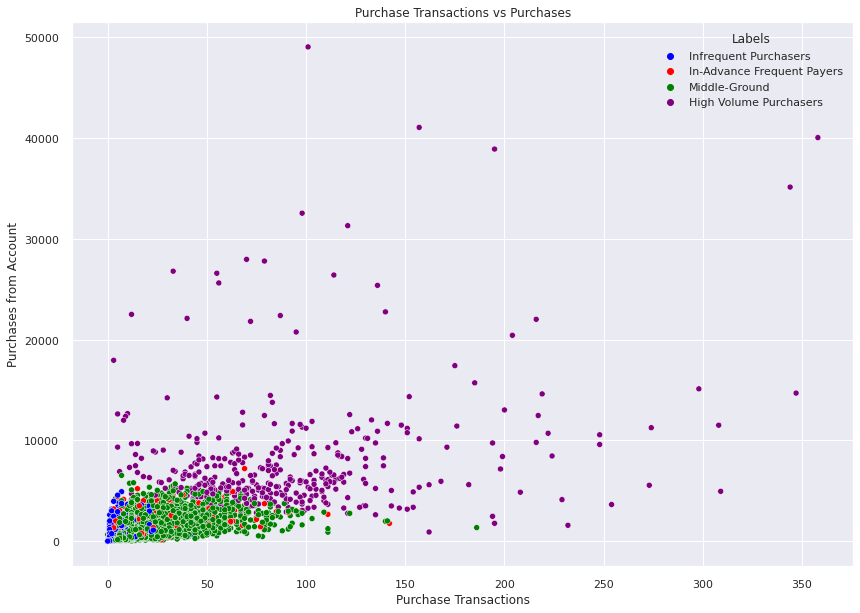

In [105]:
#now we can illustrate the groups based on a few features in a scatterplot
plt.figure(figsize=(14,10))
X = data_kmeans['purchases_trx']
Y = data_kmeans['purchases']
g = sns.scatterplot(X, Y, hue = data_kmeans['Labels'], palette = ['blue', 'red', 'green', 'purple'])
g.set_xlabel('Purchase Transactions')
g.set_ylabel('Purchases from Account')
g.set_title('Purchase Transactions vs Purchases')
#plt.xlim([0, 15000])
#plt.ylim([0, 20000])
plt.show()

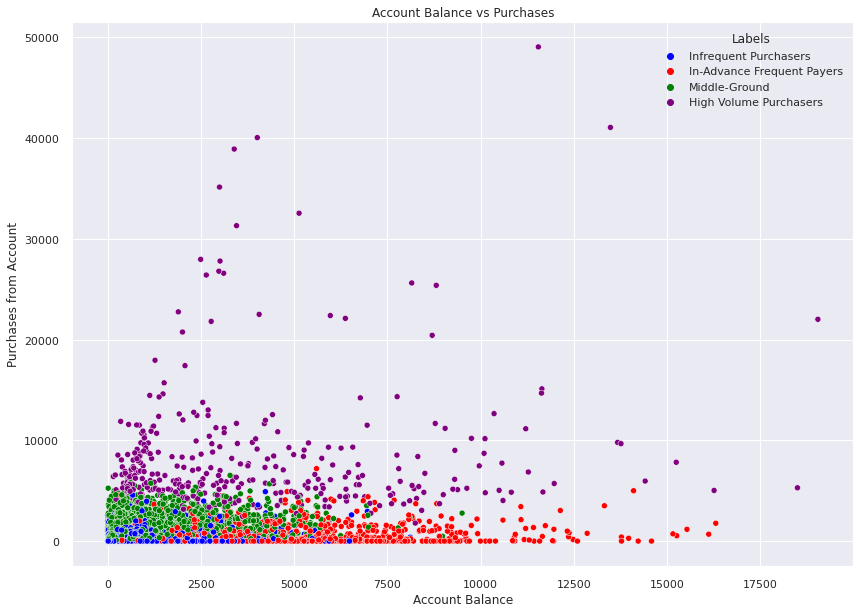

In [106]:
plt.figure(figsize=(14,10))
X = data_kmeans['balance']
Y = data_kmeans['purchases']
g = sns.scatterplot(X, Y, hue = data_kmeans['Labels'], palette = ['blue', 'red', 'green', 'purple'])
g.set_xlabel('Account Balance')
g.set_ylabel('Purchases from Account')
g.set_title('Account Balance vs Purchases')
#plt.xlim([0, 15000])
#plt.ylim([0, 20000])
plt.show()

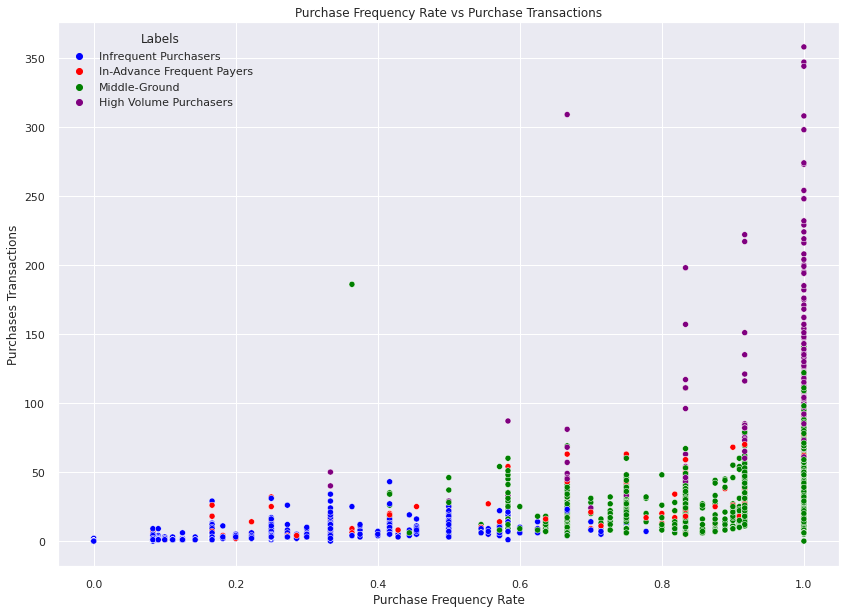

In [107]:
plt.figure(figsize=(14,10))
X = data_kmeans['purchases_frequency']
Y = data_kmeans['purchases_trx']
g = sns.scatterplot(X, Y, hue = data_kmeans['Labels'], palette = ['blue', 'red', 'green', 'purple'])
g.set_xlabel('Purchase Frequency Rate')
g.set_ylabel('Purchases Transactions')
g.set_title('Purchase Frequency Rate vs Purchase Transactions')
#plt.xlim([0, 15000])
#plt.ylim([0, 20000])
plt.show()

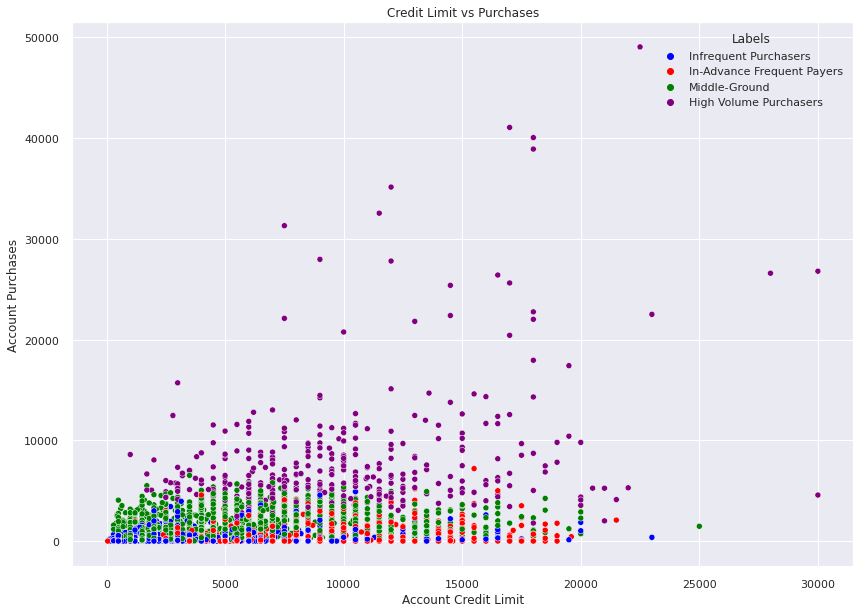

In [108]:
plt.figure(figsize=(14,10))
X = data_kmeans['credit_limit']
Y = data_kmeans['purchases']
g = sns.scatterplot(X, Y, hue = data_kmeans['Labels'], palette = ['blue', 'red', 'green', 'purple'])
g.set_xlabel('Account Credit Limit')
g.set_ylabel('Account Purchases')
g.set_title('Credit Limit vs Purchases')
#plt.xlim([0, 15000])
#plt.ylim([0, 20000])
plt.show()

# PCA

In [109]:
pca = PCA()
pca.fit(data_scaled)
pca.explained_variance_ratio_

array([2.72311770e-01, 2.03743076e-01, 8.91833372e-02, 7.57360860e-02,
       6.27661816e-02, 5.71278613e-02, 4.91618788e-02, 4.21073427e-02,
       3.68169669e-02, 3.08150790e-02, 2.36380362e-02, 1.77453962e-02,
       1.42671026e-02, 1.17865972e-02, 1.00809717e-02, 2.71162672e-03,
       6.90045972e-07])

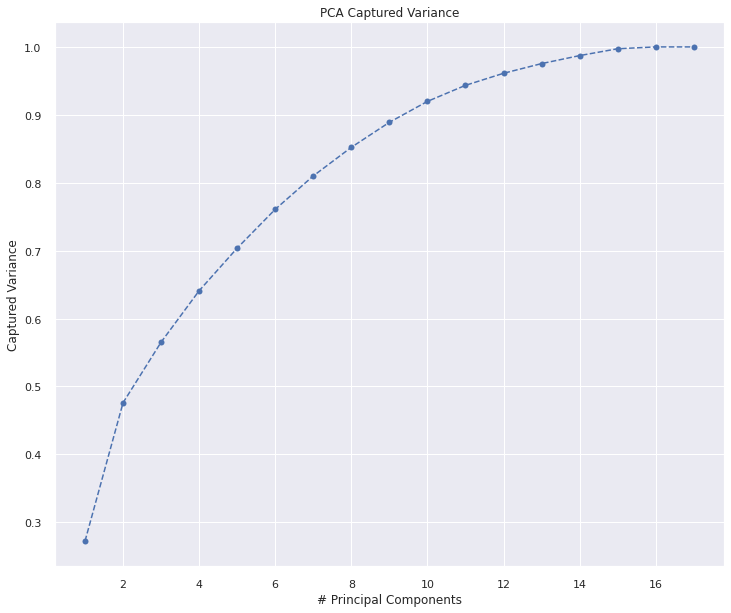

In [110]:
plt.figure(figsize=(12,10))
plt.plot(range(1, 18), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--', )
plt.title('PCA Captured Variance')
plt.xlabel('# Principal Components')
plt.ylabel('Captured Variance')
plt.show()

We got a considerable number of components, and like our KMeans algorirthm, no crystalized cutoff. We can try setting the bar at 80% variance and keep 7 of the components to keep from our analysis here and continue.



In [111]:
#so now we'll run PCA again with our chosen number of principal components:
pca = PCA(n_components=7)
pca.fit(data_scaled)
pca.components_

array([[ 0.0919859 ,  0.10981218,  0.41215123,  0.34677536,  0.33705564,
        -0.03058765,  0.32366488,  0.29476135,  0.27722626, -0.09914541,
        -0.05696036,  0.39106653,  0.21005184,  0.26372547,  0.05932632,
         0.13056503,  0.07791867],
       [ 0.4059787 ,  0.12773873,  0.0495303 ,  0.06992965, -0.01148132,
         0.43724688, -0.1865817 , -0.01474658, -0.17357691,  0.42999689,
         0.41641184, -0.0119466 ,  0.24382309,  0.26418176,  0.17041577,
        -0.1957089 , -0.00456558],
       [-0.17415522, -0.45885334,  0.24258187,  0.3685726 , -0.10375304,
        -0.00172594, -0.35574976,  0.10474308, -0.44994026, -0.08763546,
        -0.08705192, -0.07979903,  0.0951819 ,  0.28792071, -0.24870622,
         0.18419598, -0.06574319],
       [ 0.25942307,  0.15932011,  0.06400168,  0.12314791, -0.07502838,
        -0.26556462, -0.221738  ,  0.05546399, -0.26529256, -0.26659223,
        -0.33264408, -0.0241064 ,  0.12272574, -0.09751655,  0.35220392,
        -0.41815027

In [112]:
#now we make a new dataframe with these components
#and set the columns to the original columns of our data
data_pca = pd.DataFrame(data = pca.components_,
                           columns = data.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7'])
data_pca

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
Component 1,0.091986,0.109812,0.412151,0.346775,0.337056,-0.030588,0.323665,0.294761,0.277226,-0.099145,-0.056960,0.391067,0.210052,0.263725,0.059326,0.130565,0.077919
Component 2,0.405979,0.127739,0.049530,0.069930,-0.011481,0.437247,-0.186582,-0.014747,-0.173577,0.429997,0.416412,-0.011947,0.243823,0.264182,0.170416,-0.195709,-0.004566
Component 3,-0.174155,-0.458853,0.242582,0.368573,-0.103753,-0.001726,-0.355750,0.104743,-0.449940,-0.087635,-0.087052,-0.079799,0.095182,0.287921,-0.248706,0.184196,-0.065743
Component 4,0.259423,0.159320,0.064002,0.123148,-0.075028,-0.265565,-0.221738,0.055464,-0.265293,-0.266592,-0.332644,-0.024106,0.122726,-0.097517,0.352204,-0.418150,0.428374
Component 5,0.075700,-0.450859,-0.010410,-0.197021,0.337489,0.099425,-0.088538,-0.521560,0.175408,-0.159932,-0.089743,-0.052523,0.132001,0.189192,0.416811,0.201097,0.117787
Component 6,0.035763,-0.014653,0.195992,0.173006,0.145431,-0.132511,-0.085693,-0.096828,-0.047460,0.031548,-0.089787,0.078138,-0.312865,-0.065652,0.340276,-0.288661,-0.745661
Component 7,-0.263369,0.098675,0.201357,0.112734,0.268972,-0.038540,-0.157901,-0.305746,0.043229,0.137316,0.196701,0.104231,-0.543884,0.168795,-0.204179,-0.280359,0.400662


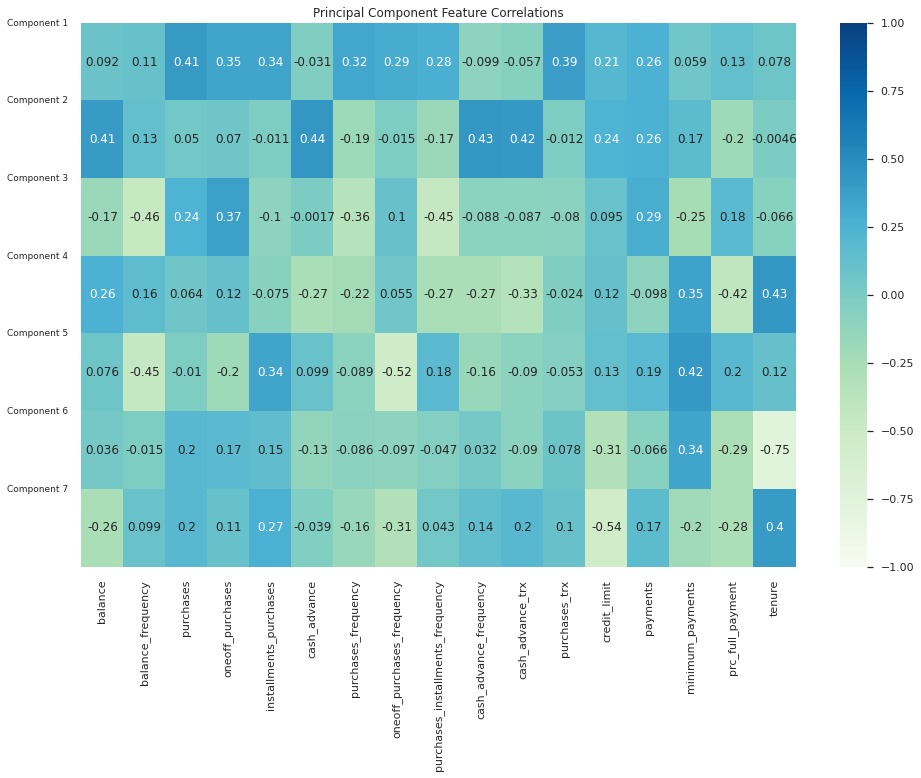

In [113]:
#We can make another heatmap to graph out the components:
plt.figure(figsize=(16,10))
sns.heatmap(data_pca, vmin=-1, vmax=1, cmap='GnBu', annot=True)
plt.title('Principal Component Feature Correlations')
plt.yticks([0, 1, 2, 3, 4, 5, 6], ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7'],rotation=0, fontsize=9)
plt.show()

In [114]:
pca_scores = pca.transform(data_scaled)
pca_scores

array([[-1.69639528, -1.12258398,  0.49156157, ...,  0.07983049,
         0.11823378,  0.80899271],
       [-1.21568083,  2.43563777,  0.69465785, ...,  0.80301878,
        -0.9177772 , -0.32296908],
       [ 0.93585329, -0.38520157, -0.02595329, ..., -1.98728533,
        -0.68213931, -1.62472141],
       ...,
       [-0.93002625, -1.84123564, -0.35003709, ..., -0.21949247,
         3.0902687 , -1.42175665],
       [-2.35600968, -0.71873015,  1.04852241, ..., -0.55268973,
         3.33345233, -0.9968098 ],
       [-0.59681823, -0.44601943,  1.10524573, ..., -1.93090587,
         3.48494524, -1.55074737]])

In [115]:
pca_scores.shape

(8636, 7)

Next we perform KMeans clustering again on this data on the transformed components from PCA.



In [116]:
wcss = []
for i in range(1, 18):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=3)
    kmeans_pca.fit(pca_scores)
    wcss.append(kmeans_pca.inertia_)

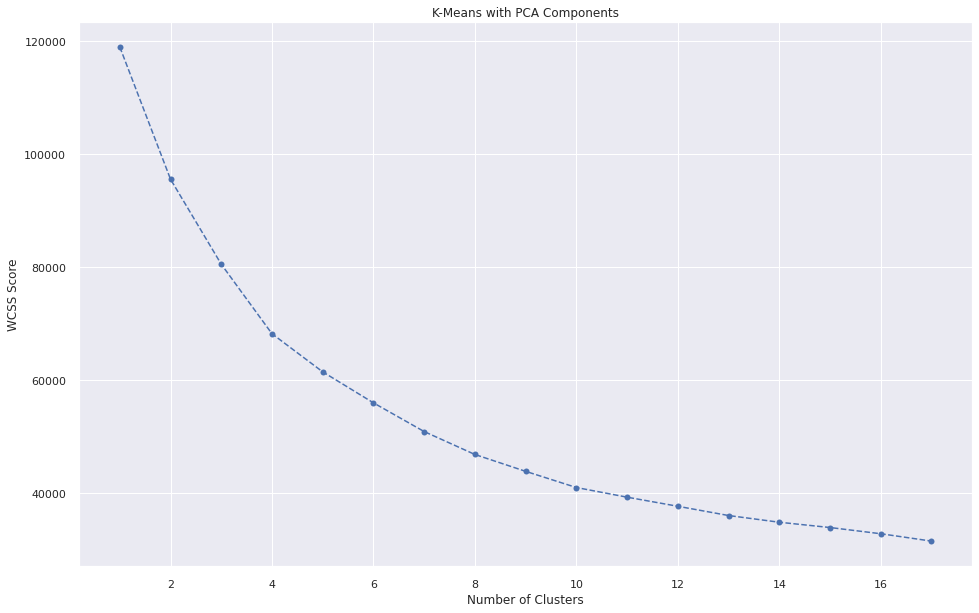

In [117]:
plt.figure(figsize=(16,10))
plt.plot(range(1, 18), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Score')
plt.title('K-Means with PCA Components')
plt.show()

In [118]:
# I'll go with 4 clusters here, as the steps after the 4th cluster are quite small, 
#so we'll try to capture the most with the smallest amount of clusters possible. It does happen to be in line with the amount of groups we originally chose.
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=3)
kmeans_pca.fit(pca_scores)

KMeans(n_clusters=4, random_state=3)

In [119]:
data_pca_kmeans = pd.concat([data.reset_index(drop=True), pd.DataFrame(pca_scores)], axis=1)
data_pca_kmeans.columns.values[-7:] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7']

data_pca_kmeans['K-Means PCA Segment'] = kmeans_pca.labels_
data_pca_kmeans

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,...,prc_full_payment,tenure,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,K-Means PCA Segment
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.000000,12,-1.696395,-1.122584,0.491562,0.719521,0.079830,0.118234,0.808993,3
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.222222,12,-1.215681,2.435638,0.694658,-0.098843,0.803019,-0.917777,-0.322969,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,12,0.935853,-0.385202,-0.025953,1.293844,-1.987285,-0.682139,-1.624721,0
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.000000,12,-1.614638,-0.724586,0.272358,1.086116,-0.427814,0.082982,0.687001,3
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,...,0.000000,12,0.223701,-0.783610,-1.184434,0.721353,0.801243,0.525879,0.788893,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,...,0.000000,6,-2.221637,-1.328411,1.643826,-1.421354,-0.175573,3.518499,-1.313848,3
8632,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,0.500000,6,-0.362326,-2.032249,-0.875053,-2.800940,-0.313566,2.808854,-1.549426,0
8633,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,0.250000,6,-0.930026,-1.841236,-0.350037,-2.351591,-0.219492,3.090269,-1.421757,0
8634,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,0.250000,6,-2.356010,-0.718730,1.048522,-1.776467,-0.552690,3.333452,-0.996810,3


Nowe we have a dataframe with the original features, a fixed amount of PCA components, and their segment label according to the KMeans clustering applied to a fixed amount of groups.

In [120]:
#Now, like before, we'll group by the segments and get the mean of all the features and components.

data_pca_kmeans_freq = data_pca_kmeans.groupby(['K-Means PCA Segment']).mean()
data_pca_kmeans_freq

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,...,minimum_payments,prc_full_payment,tenure,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7
K-Means PCA Segment,,,,,,,,,,,,,,,,,,,,,
0,980.176743,0.952599,1394.873522,693.819129,701.244671,220.240003,0.897821,0.322136,0.724299,0.043864,...,652.021767,0.278329,11.626447,1.126596,-1.066142,-0.662952,-0.306273,-0.111689,-0.181701,-0.161952
1,4605.548432,0.968599,498.682747,311.069447,187.699753,4559.843696,0.287794,0.137829,0.186591,0.484636,...,2016.467254,0.035606,11.378401,-0.561778,3.459076,-0.346844,-0.455888,0.078296,-0.243801,-0.278175
2,4016.425779,0.985032,9244.592607,6227.890107,3018.845357,824.450998,0.944232,0.749096,0.783810,0.081872,...,2423.089070,0.297760,11.957143,7.444959,1.316079,1.309899,0.570205,0.244185,0.899562,0.643723
3,1044.257037,0.817909,282.897691,214.773612,68.473096,582.260047,0.188296,0.089570,0.094686,0.115837,...,583.471426,0.086461,11.473576,-1.313860,-0.240456,0.568734,0.354452,0.052878,0.161923,0.174043


In [121]:
data_pca_kmeans_freq['Obs.'] = data_pca_kmeans[['K-Means PCA Segment', 'balance']].groupby(['K-Means PCA Segment']).count()
data_pca_kmeans_freq['Obs. Prop.'] = data_pca_kmeans_freq['Obs.'] / data_pca_kmeans_freq['Obs.'].sum()
data_pca_kmeans_freq = data_pca_kmeans_freq.rename({0:'Middle Ground', 1:'In-Advance Frequent Payers', 2:'High Volume Purchasers', 3:'Infrequent Purchasers'})
data_pca_kmeans_freq

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,...,tenure,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Obs.,Obs. Prop.
K-Means PCA Segment,,,,,,,,,,,,,,,,,,,,,
Middle Ground,980.176743,0.952599,1394.873522,693.819129,701.244671,220.240003,0.897821,0.322136,0.724299,0.043864,...,11.626447,1.126596,-1.066142,-0.662952,-0.306273,-0.111689,-0.181701,-0.161952,3282,0.380037
In-Advance Frequent Payers,4605.548432,0.968599,498.682747,311.069447,187.699753,4559.843696,0.287794,0.137829,0.186591,0.484636,...,11.378401,-0.561778,3.459076,-0.346844,-0.455888,0.078296,-0.243801,-0.278175,1176,0.136174
High Volume Purchasers,4016.425779,0.985032,9244.592607,6227.890107,3018.845357,824.450998,0.944232,0.749096,0.783810,0.081872,...,11.957143,7.444959,1.316079,1.309899,0.570205,0.244185,0.899562,0.643723,280,0.032422
Infrequent Purchasers,1044.257037,0.817909,282.897691,214.773612,68.473096,582.260047,0.188296,0.089570,0.094686,0.115837,...,11.473576,-1.313860,-0.240456,0.568734,0.354452,0.052878,0.161923,0.174043,3898,0.451366


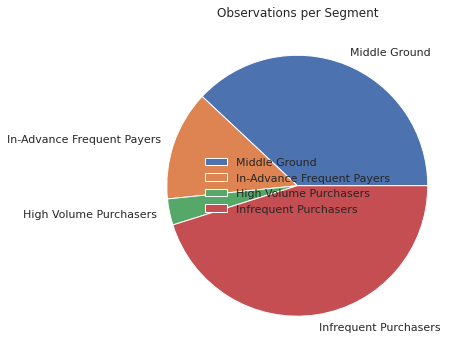

In [122]:
data_pca_kmeans_freq.plot.pie(y='Obs.', figsize=(6, 6))
plt.legend(loc='center')
plt.ylabel(None)
plt.title('Observations per Segment')
plt.show()

The order of the groups have been altered since we incorporated PCA components based on our KMeans clustering.

Let's now plot some of the PCA components against each other and color by the KMeans segments below:

In [123]:
data_pca_kmeans['Legend'] = data_pca_kmeans['K-Means PCA Segment'].map({0:'Middle Ground', 1:'In-Advance Frequent Payers', 2:'High Volume Purchasers', 3:'Infrequent Purchasers'})

We have several PCA components, so it would be a little cumbersome to plot and keep all possible combinations of components here.

Therefore, plotting selected components.

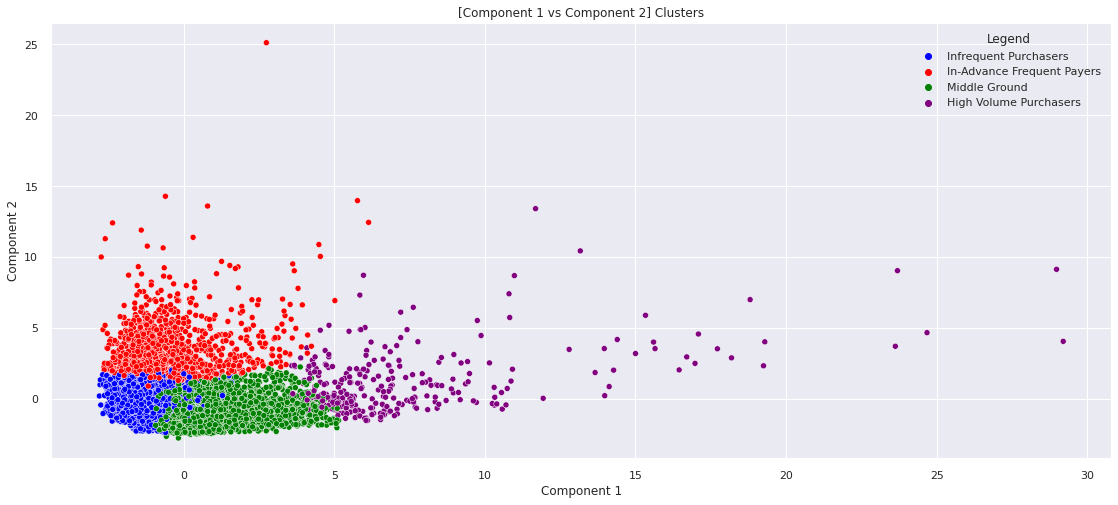

In [124]:
X = data_pca_kmeans['Component 1']
Y = data_pca_kmeans['Component 2']
plt.figure(figsize=(19, 8))
sns.scatterplot(X, Y, hue = data_pca_kmeans['Legend'], palette = ['blue', 'red', 'green', 'purple'])
plt.title('[Component 1 vs Component 2] Clusters')
plt.show()

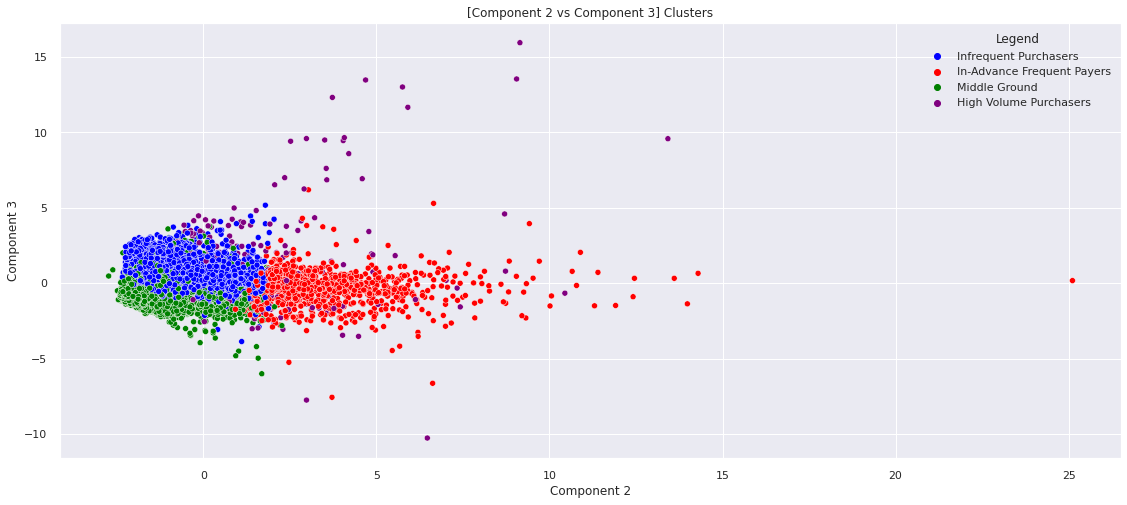

In [125]:
X = data_pca_kmeans['Component 2']
Y = data_pca_kmeans['Component 3']
plt.figure(figsize=(19, 8))
sns.scatterplot(X, Y, hue = data_pca_kmeans['Legend'], palette = ['blue', 'red', 'green', 'purple'])
plt.title('[Component 2 vs Component 3] Clusters')
plt.show()

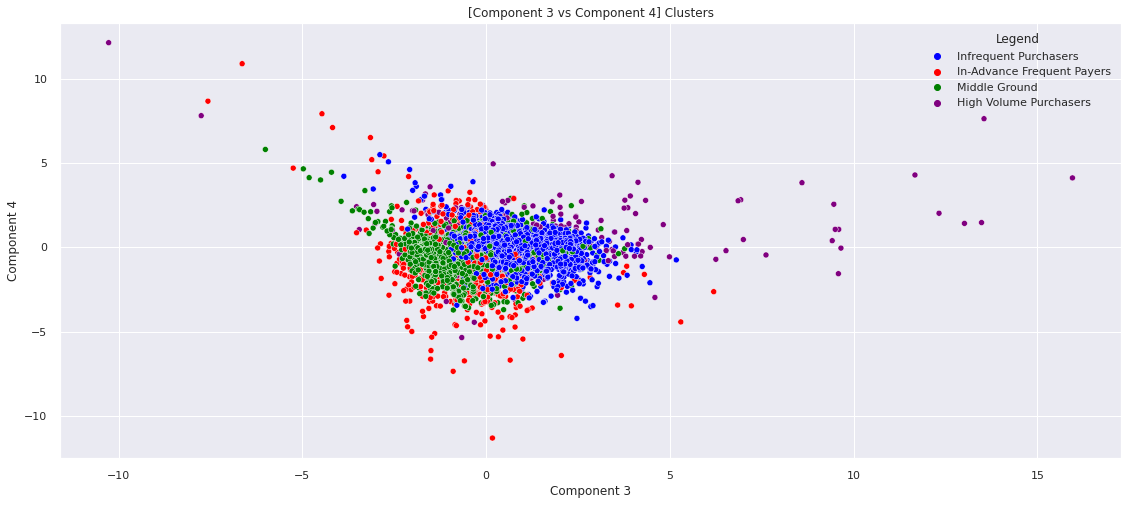

In [126]:
X = data_pca_kmeans['Component 3']
Y = data_pca_kmeans['Component 4']
plt.figure(figsize=(19, 8))
sns.scatterplot(X, Y, hue = data_pca_kmeans['Legend'], palette = ['blue', 'red', 'green', 'purple'])
plt.title('[Component 3 vs Component 4] Clusters')
plt.show()

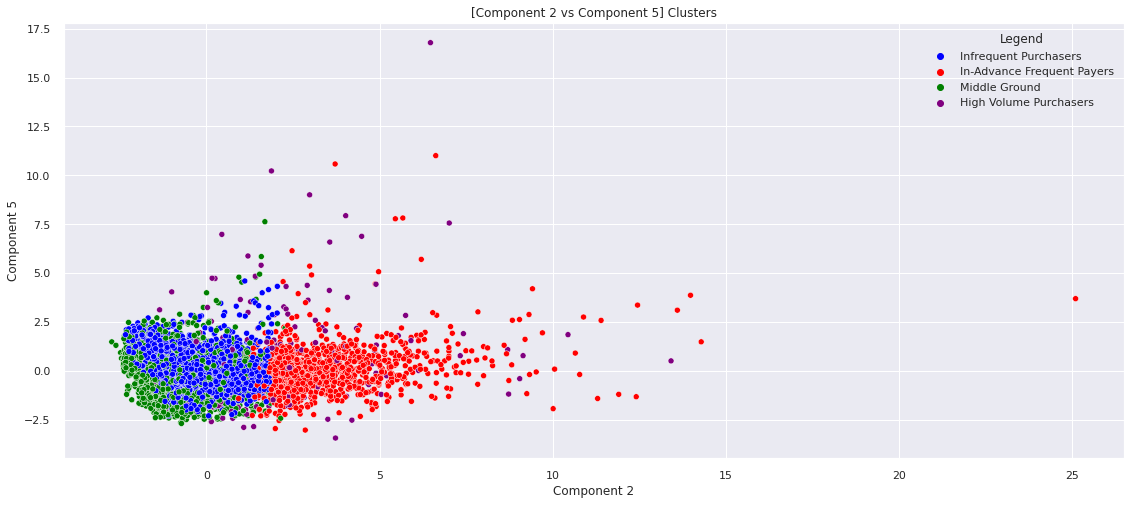

In [127]:
X = data_pca_kmeans['Component 2']
Y = data_pca_kmeans['Component 5']
plt.figure(figsize=(19, 8))
sns.scatterplot(X, Y, hue = data_pca_kmeans['Legend'], palette = ['blue', 'red', 'green', 'purple'])
plt.title('[Component 2 vs Component 5] Clusters')
plt.show()

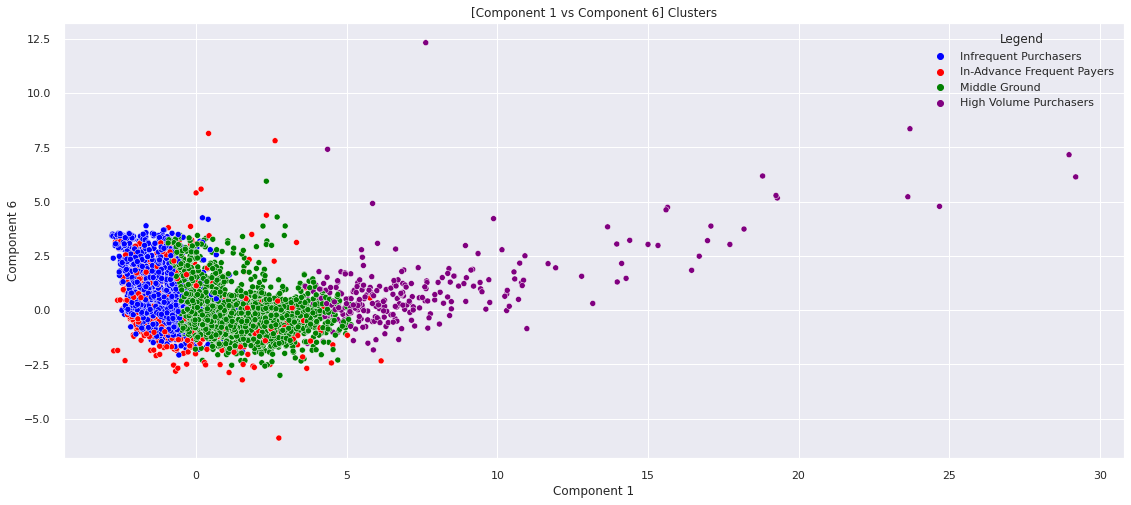

In [128]:
X = data_pca_kmeans['Component 1']
Y = data_pca_kmeans['Component 6']
plt.figure(figsize=(19, 8))
sns.scatterplot(X, Y, hue = data_pca_kmeans['Legend'], palette = ['blue', 'red', 'green', 'purple'])
plt.title('[Component 1 vs Component 6] Clusters')
plt.show()

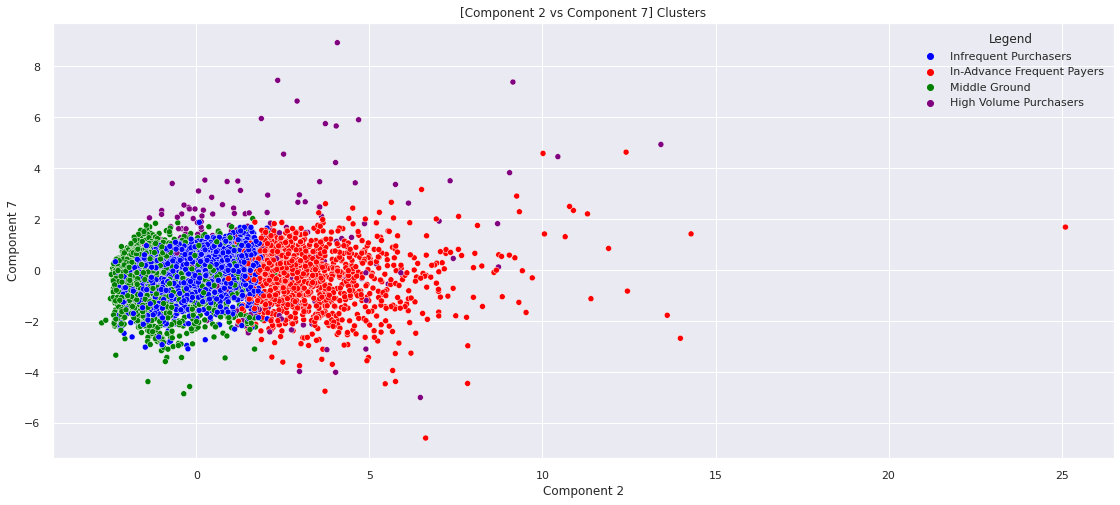

In [129]:
X = data_pca_kmeans['Component 2']
Y = data_pca_kmeans['Component 7']
plt.figure(figsize=(19, 8))
sns.scatterplot(X, Y, hue = data_pca_kmeans['Legend'], palette = ['blue', 'red', 'green', 'purple'])
plt.title('[Component 2 vs Component 7] Clusters')
plt.show()

In [130]:
df1 = df.drop('CUST_ID', axis = 1) #dropping Customer ID 
df1.fillna(method ='bfill', inplace = True) #filling the missing values with BFILL method

#df1["MINIMUM_PAYMENTS"].fillna(df1["MINIMUM_PAYMENTS"].mean(), inplace=True)
#df1["CREDIT_LIMIT"].fillna(df1["CREDIT_LIMIT"].mean(), inplace=True)

In [131]:
#Detecting outliers
for i in df1.select_dtypes(include=['float64','int64']).columns:
  max_threshold=df1[i].quantile(0.95)
  min_threshold=df1[i].quantile(0.05)
  df1_no_outlier=df1[(df1[i] < max_threshold) & (df1[i] > min_threshold)].shape
  print(" outlier in ",i,"is" ,int(((df1.shape[0]-df1_no_outlier[0])/df1.shape[0])*100),"%")

 outlier in  BALANCE is 10 %
 outlier in  BALANCE_FREQUENCY is 75 %
 outlier in  PURCHASES is 27 %
 outlier in  ONEOFF_PURCHASES is 53 %
 outlier in  INSTALLMENTS_PURCHASES is 48 %
 outlier in  CASH_ADVANCE is 56 %
 outlier in  PURCHASES_FREQUENCY is 47 %
 outlier in  ONEOFF_PURCHASES_FREQUENCY is 53 %
 outlier in  PURCHASES_INSTALLMENTS_FREQUENCY is 58 %
 outlier in  CASH_ADVANCE_FREQUENCY is 57 %
 outlier in  CASH_ADVANCE_TRX is 56 %
 outlier in  PURCHASES_TRX is 27 %
 outlier in  CREDIT_LIMIT is 14 %
 outlier in  PAYMENTS is 10 %
 outlier in  MINIMUM_PAYMENTS is 10 %
 outlier in  PRC_FULL_PAYMENT is 71 %
 outlier in  TENURE is 91 %


In [132]:
#remove outliers from columns having nearly 10% outlier
max_threshold_BALANCE=df1["BALANCE"].quantile(0.95)
min_threshold_BALANCE=df1["BALANCE"].quantile(0.05)
max_threshold_CREDIT_LIMIT=df1["CREDIT_LIMIT"].quantile(0.95)
min_threshold_CREDIT_LIMIT=df1["CREDIT_LIMIT"].quantile(0.05)
max_threshold_PAYMENTS=df1["PAYMENTS"].quantile(0.95)
min_threshold_PAYMENTS=df1["PAYMENTS"].quantile(0.05)
df1_no_outlier=df1[(df1["CREDIT_LIMIT"] < max_threshold_CREDIT_LIMIT) & (df1["CREDIT_LIMIT"] > min_threshold_CREDIT_LIMIT) & (df1["BALANCE"] < max_threshold_BALANCE) & (df1["BALANCE"] > min_threshold_BALANCE) &  (df1["PAYMENTS"] < max_threshold_PAYMENTS) & (df1["PAYMENTS"] > min_threshold_PAYMENTS)]

In [133]:
#import EDA tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import modeling tools and metrics
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import davies_bouldin_score

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [134]:
#Normalizing the Data 
normalized_df = pd.DataFrame(normalize(df1_no_outlier))
normalized_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.293876,0.000083,0.000000,0.000000,0.000000,0.59124,0.000000,0.000000,0.000000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.00002,0.001101
1,0.310798,0.000125,0.096307,0.096307,0.000000,0.00000,0.000125,0.000125,0.000000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.00000,0.001495
2,0.504284,0.000617,0.009867,0.009867,0.000000,0.00000,0.000051,0.000051,0.000000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.00000,0.007400
3,0.428658,0.000237,0.315788,0.000000,0.315788,0.00000,0.000158,0.000000,0.000138,0.000000,0.000000,0.001895,0.426330,0.331604,0.570156,0.00000,0.002842
4,0.584314,0.000320,0.139762,0.000000,0.139762,0.00000,0.000320,0.000000,0.000320,0.000000,0.000000,0.003845,0.736940,0.217578,0.170468,0.00000,0.003845


In [135]:
#appling PCA
pca = PCA() 
pcadf = pca.fit_transform(normalized_df) 
pcadf = pd.DataFrame(pcadf) 

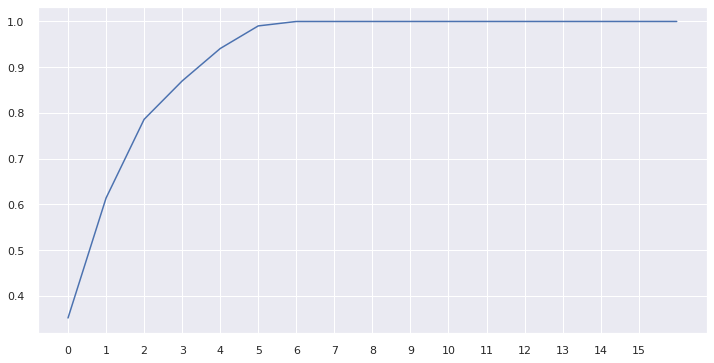

In [136]:
plt.subplots(figsize=(12,6))
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xticks(np.arange(0,16,1));

In [137]:
#Setting 2 as n_components
pca = PCA(n_components = 2) 
pcadf = pca.fit_transform(normalized_df) 
pcadf = pd.DataFrame(pcadf) 
pcadf.columns = ['PC1', 'PC2']   

pcadf.head()

,PC1,PC2
0,0.346585,-0.032200
1,-0.126068,-0.226061
2,0.162606,-0.023479
3,0.259072,0.336400
4,0.154561,-0.057130


# Training

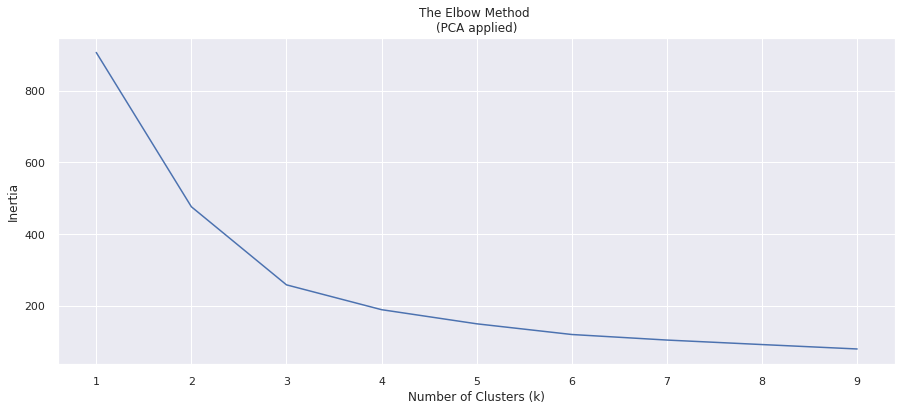

In [138]:
#using elbow rule on pcadf (PCA applied)
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(pcadf)
    inertia.append(kmeanModel.inertia_)
plt.figure(figsize=(15,6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method \n(PCA applied)')
plt.show()

In [139]:
#Creating evaluate function to evaluate our models performance
def evaluate(model, data, silhouette_visualizer=False):
  """
  Plotting Silhouette Diagram or Silhouette Visualizer, print Silhouette Score and Davies Bouldin Score to evaluate your model performance.

  Parameters:
  model : pass your estimator with model argument to this function.
  data : data is your dataframe which is going to be trained.
  silhouette_visualizer : defualt is False, you can plot silhouette diagram by passing True. 
  """
  if silhouette_visualizer:
    from yellowbrick.cluster import SilhouetteVisualizer

    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(data)

  y = model.fit_predict(data)


  SC = "Silhouette Score"+" : "+str("{:.2f}".format(silhouette_score(data, y)))
  DBC = "Davies Bouldin Score"+" : "+str("{:.2f}".format(davies_bouldin_score(data, y)))


  print(SC)
  print(DBC)

In [140]:
#training model and evaluation
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  print("Number of Clusters : " + str(i))
  evaluate(kmeans, pcadf)
  print("====================")

Number of Clusters : 2
Silhouette Score : 0.46
Davies Bouldin Score : 0.92
Number of Clusters : 3
Silhouette Score : 0.51
Davies Bouldin Score : 0.71
Number of Clusters : 4
Silhouette Score : 0.48
Davies Bouldin Score : 0.76
Number of Clusters : 5
Silhouette Score : 0.45
Davies Bouldin Score : 0.81
Number of Clusters : 6
Silhouette Score : 0.45
Davies Bouldin Score : 0.74
Number of Clusters : 7
Silhouette Score : 0.45
Davies Bouldin Score : 0.76
Number of Clusters : 8
Silhouette Score : 0.45
Davies Bouldin Score : 0.74
Number of Clusters : 9
Silhouette Score : 0.44
Davies Bouldin Score : 0.76
Number of Clusters : 10
Silhouette Score : 0.39
Davies Bouldin Score : 0.81


Silhouette Score : 0.51
Davies Bouldin Score : 0.71


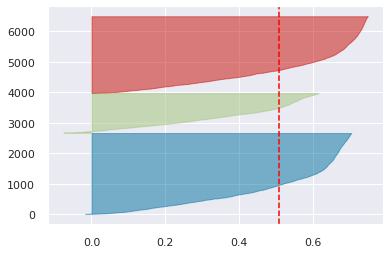

In [141]:
#plotting silhouette diagram for n_clusters = 3
kmeans = KMeans(n_clusters=3, random_state=42)
evaluate(kmeans, pcadf, silhouette_visualizer=True)

Conclusion : We can accept the KMeans with 3 as n_clusters because the size of clusters are almost similar.|

## GaussianMixture

### Full CovarianceType

In [142]:
#training model and evaluation
for i in range(2,11):
  gmm = GaussianMixture(n_components=i, random_state=42, covariance_type = 'diag')
  print("Number of Components : " + str(i))
  evaluate(gmm, pcadf)
  print("====================")

Number of Components : 2
Silhouette Score : 0.46
Davies Bouldin Score : 0.92
Number of Components : 3
Silhouette Score : 0.35
Davies Bouldin Score : 1.20
Number of Components : 4
Silhouette Score : 0.30
Davies Bouldin Score : 0.98
Number of Components : 5
Silhouette Score : 0.34
Davies Bouldin Score : 0.87
Number of Components : 6
Silhouette Score : 0.29
Davies Bouldin Score : 1.12
Number of Components : 7
Silhouette Score : 0.28
Davies Bouldin Score : 0.97
Number of Components : 8
Silhouette Score : 0.31
Davies Bouldin Score : 1.03
Number of Components : 9
Silhouette Score : 0.32
Davies Bouldin Score : 0.93
Number of Components : 10
Silhouette Score : 0.28
Davies Bouldin Score : 1.03


In [143]:
#training model and evaluation
for i in range(2,11):
  spc = SpectralClustering(n_clusters=i, affinity='rbf') 
  print("Number of Clusters : " + str(i))
  evaluate(spc, pcadf)
  print("====================")

Number of Clusters : 2
Silhouette Score : 0.46
Davies Bouldin Score : 0.92
Number of Clusters : 3
Silhouette Score : 0.51
Davies Bouldin Score : 0.71
Number of Clusters : 4
Silhouette Score : 0.47
Davies Bouldin Score : 0.73
Number of Clusters : 5
Silhouette Score : 0.41
Davies Bouldin Score : 0.77
Number of Clusters : 6
Silhouette Score : 0.35
Davies Bouldin Score : 0.84
Number of Clusters : 7
Silhouette Score : 0.31
Davies Bouldin Score : 0.86
Number of Clusters : 8
Silhouette Score : 0.31
Davies Bouldin Score : 0.85
Number of Clusters : 9
Silhouette Score : 0.33
Davies Bouldin Score : 0.79
Number of Clusters : 10
Silhouette Score : 0.27
Davies Bouldin Score : 0.85


In [144]:
#train model and evaluate the performance
linkages = ["ward", "single", "average"]
for i in range(2,11):
  for lk in linkages:
    hcluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage=lk)
    print("Number of Clusters : " + str(i) + "  linkage : "+lk)
    evaluate(hcluster,pcadf)
    print("====================")

Number of Clusters : 2  linkage : ward
Silhouette Score : 0.45
Davies Bouldin Score : 0.94
Number of Clusters : 2  linkage : single
Silhouette Score : 0.36
Davies Bouldin Score : 0.47
Number of Clusters : 2  linkage : average
Silhouette Score : 0.35
Davies Bouldin Score : 0.66
Number of Clusters : 3  linkage : ward
Silhouette Score : 0.47
Davies Bouldin Score : 0.69
Number of Clusters : 3  linkage : single
Silhouette Score : 0.32
Davies Bouldin Score : 0.49
Number of Clusters : 3  linkage : average
Silhouette Score : 0.41
Davies Bouldin Score : 0.74
Number of Clusters : 4  linkage : ward
Silhouette Score : 0.45
Davies Bouldin Score : 0.77
Number of Clusters : 4  linkage : single
Silhouette Score : 0.14
Davies Bouldin Score : 0.52
Number of Clusters : 4  linkage : average
Silhouette Score : 0.37
Davies Bouldin Score : 0.82
Number of Clusters : 5  linkage : ward
Silhouette Score : 0.38
Davies Bouldin Score : 0.91
Number of Clusters : 5  linkage : single
Silhouette Score : 0.14
Davies Bou

In [145]:
#create plot model clustering function
def plot_model_clustering(model, data):
  plt.figure(figsize=(15,7))
  model.fit(data)
  labels= model.labels_
  df_label=data.copy()
  df_label['labels']= labels
  ax = sns.scatterplot(x='PC1', y='PC2', hue='labels', data=df_label, palette='bright')
  for index in range(len(str(model))):
    if str(model)[index] == '(':
      ind = index
  ax.set_title(str(model)[:ind])

  evaluate(model, data)

Silhouette Score : 0.51
Davies Bouldin Score : 0.71


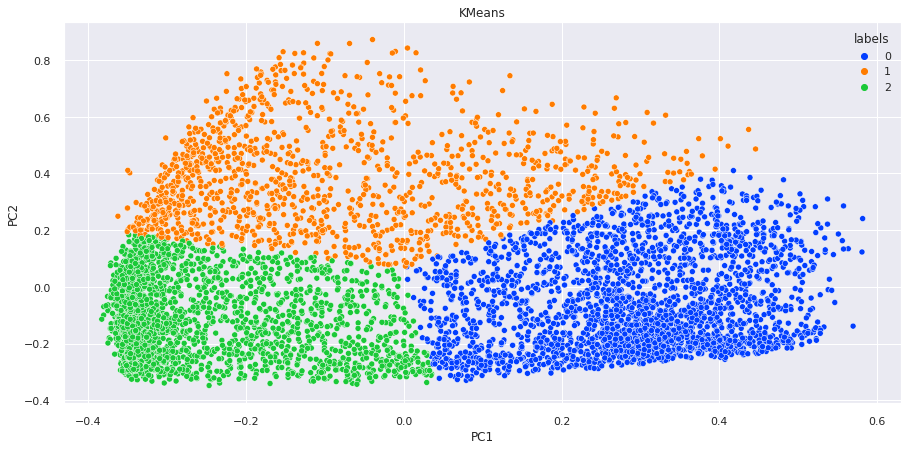

In [146]:
plot_model_clustering(kmeans, pcadf)

Silhouette Score : 0.47
Davies Bouldin Score : 0.69


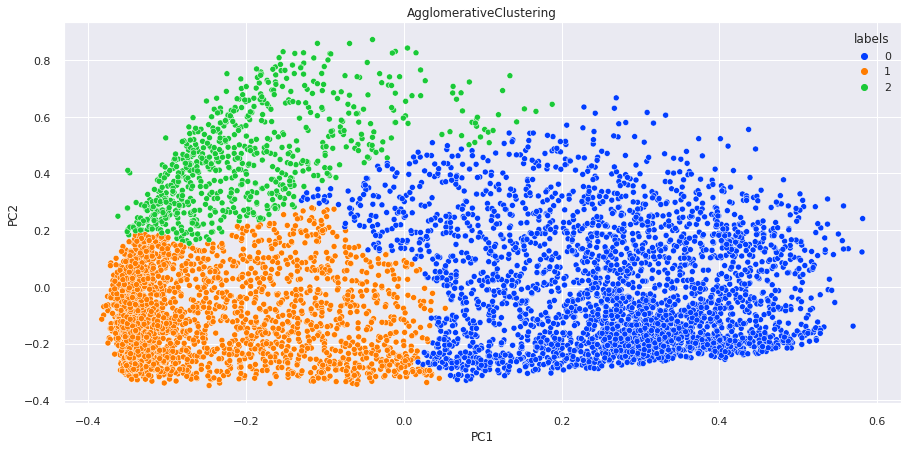

In [147]:
hcluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage="ward")
plot_model_clustering(hcluster, pcadf)

Silhouette Score : 0.51
Davies Bouldin Score : 0.71


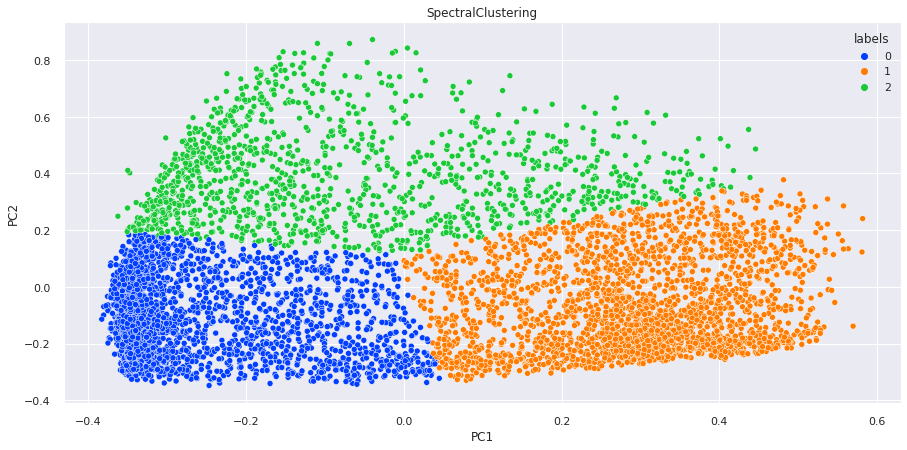

In [148]:
hcluster = SpectralClustering(n_clusters=3, affinity='rbf')
plot_model_clustering(hcluster, pcadf)